#**Importing Necessary Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####**Importing dataset from local to colab**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
data=pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#**Analysing DataSet**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
x=data.drop(['Exited'],axis=1)
y=data['Exited']

In [ ]:
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
x.shape

(10000, 13)

In [ ]:
y.shape

(10000,)

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(10000, 14)

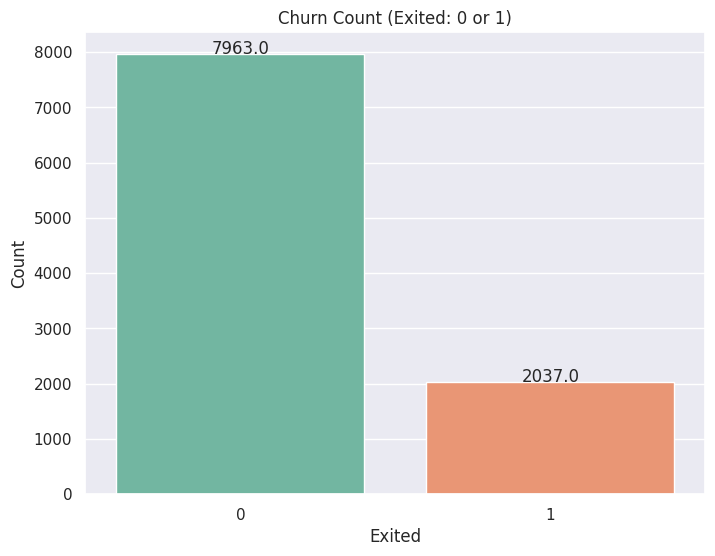

In [ ]:

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
exited_count = data['Exited'].value_counts()

ax = sns.barplot(x=exited_count.index, y=exited_count.values, palette='Set2')

ax.set_title('Churn Count (Exited: 0 or 1)')
ax.set_xlabel('Exited')
ax.set_ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

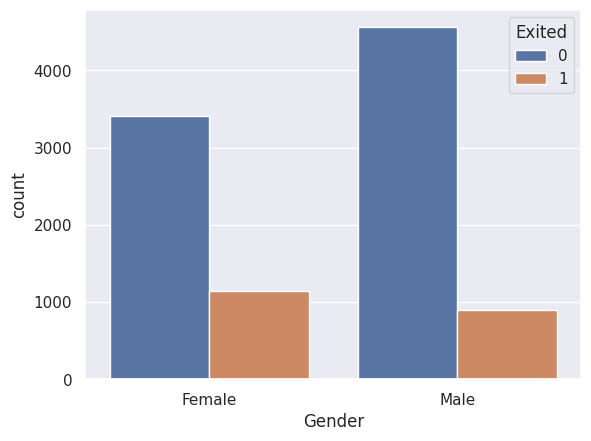

In [ ]:
sns.countplot(x='Gender',hue='Exited',data=data)

<Axes: xlabel='Geography', ylabel='count'>

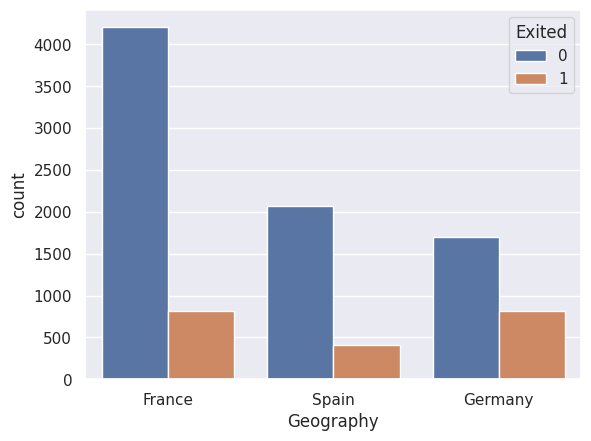

In [ ]:
sns.countplot(x='Geography',hue='Exited',data=data)

#**Data PreProcessing**

In [ ]:
f=data.drop('CustomerId',axis=1)

In [ ]:
f

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
f.shape

(10000, 13)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for column in data.columns:
    if data[column].dtype==np.number:
        continue
    data[column]=le.fit_transform(data[column])

<ipython-input-48-0522e939fd42>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
<ipython-input-48-0522e939fd42>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
<ipython-input-48-0522e939fd42>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
<ipython-input-48-0522e939fd42>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:
<ipython-input-48-0522e939fd42>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprec

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,2736,1115,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,1,3258,1177,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,2,2104,2040,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,3,5435,289,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,4,6899,1822,459,2,0,25,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1599,1999,380,0,1,21,5,0.00,1,1,0,96270.64,0
9996,9996,161,1336,125,0,1,17,10,57369.61,0,1,1,101699.77,0
9997,9997,717,1570,318,0,0,18,7,0.00,0,0,1,42085.58,1
9998,9998,4656,2345,381,1,1,24,3,75075.31,1,1,0,92888.52,1


In [ ]:
x=data.drop(['Exited'],axis=1)

In [ ]:
y=data.Exited

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

#**Scalling the DataSet**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
x_feature=ss.fit_transform(x)

In [ ]:
x_feature

array([[-1.73187761, -0.7840994 , -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.6032733 , -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -1.00303063,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.48350152,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11899189,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.86689143,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

#**Splitting Data Into Train & Test**

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x_feature,y,test_size=0.2,random_state=1)

In [ ]:
xtrain.shape

(8000, 13)

In [ ]:
ytrain.shape

(8000,)

In [ ]:
xtest.shape

(2000, 13)

In [ ]:
ytest.shape

(2000,)

####**Choose Model for prediction**

####**1)LogisticRegression**

In [ ]:
lr=LogisticRegression()


In [ ]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
predict=lr.predict(xtest)

In [ ]:
lr.score(xtest,ytest)

0.8035

####**2)RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()

In [ ]:
rc

RandomForestClassifier()

In [ ]:
rc.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
predict=rc.predict(xtest)

In [ ]:
a=rc.score(xtest,ytest)

In [ ]:
print("Accuracy: ",a)

Accuracy:  0.8615


####**3)Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
gb_model.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=42)

In [ ]:
pred=gb_model.predict(xtest)

In [ ]:
a=accuracy_score(ytest,pred)

In [ ]:
print("Accuracy Score: ",a)

Accuracy Score:  0.864


#Accuracy Score Was : 86.4%